In [6]:
import os
import sys
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import warnings
warnings.filterwarnings("ignore")

# Add model handler path
sys.path.append(os.path.abspath("../../model"))
from main_model_handler import RiskModelHandler

# ====== Load and Process Training Data ======
df = pd.read_csv("../../dataset/train_dataset.csv")

# Compute percentages and percentiles
sem3_subjects = ["Math-3 Theory", "DE Theory", "FSD Theory", "Python Theory"]
df["Sem 3 Percentage"] = df[sem3_subjects].sum(axis=1) / 4
df["Sem 2 Percentage"] = df[[
    "Math-2 Theory", "Data Structures using Java Theory", "DBMS Theory",
    "Fundamental of Electronics and Electrical Theory", "Java-2 Theory"
]].mean(axis=1)
df["Sem 2 Percentile"] = df["Sem 2 Percentage"].rank(pct=True) * 100
df["Sem 3 Percentile"] = df["Sem 3 Percentage"].rank(pct=True) * 100
df["Percentile Drop"] = df["Sem 2 Percentile"] - df["Sem 3 Percentile"]
df["Risk Flag"] = (df["Percentile Drop"] > 10).astype(int)

# Ground truth labels
y_true = df["Risk Flag"]

# Drop leakage and irrelevant columns
columns_to_drop = [
    "Math-3 Theory", "DE Theory", "FSD Theory", "Python Theory",
    "Sem 3 Percentage", "Sem 2 Percentage",
    "Sem 3 Percentile", "Sem 2 Percentile", "Percentile Drop",
    "Risk Flag",
    "DE Practical", "FSD Practical", "Python Practical",
    "Communication Theory", "Law Theory"
]
df.drop(columns=columns_to_drop, inplace=True)

# ====== Load Model and Predict ======
handler = RiskModelHandler(model_path="../model/stacking_risk_model.joblib")

# Predict returns binary labels based on threshold
y_pred = handler.predict(df)

# ====== Evaluate ======
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred, zero_division=0)
rec = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print("\n--- Evaluation on Training Dataset ---")
print(f"Accuracy     : {acc:.4f}")
print(f"Precision    : {prec:.4f}")
print(f"Recall       : {rec:.4f}")
print(f"F1 Score     : {f1:.4f}")



--- Evaluation on Training Dataset ---
Accuracy     : 0.6878
Precision    : 0.3611
Recall       : 0.7123
F1 Score     : 0.4793


In [10]:
import os
import sys
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import warnings
warnings.filterwarnings("ignore")

# Add model handler path
sys.path.append(os.path.abspath("../../model"))
from main_model_handler import RiskModelHandler

# ====== Load and Process Training Data ======
df = pd.read_csv("../../dataset/test_dataset.csv")

# Compute percentages and percentiles
sem3_subjects = ["Math-3 Theory", "DE Theory", "FSD Theory", "Python Theory"]
df["Sem 3 Percentage"] = df[sem3_subjects].sum(axis=1) / 4
df["Sem 2 Percentage"] = df[[
    "Math-2 Theory", "Data Structures using Java Theory", "DBMS Theory",
    "Fundamental of Electronics and Electrical Theory", "Java-2 Theory"
]].mean(axis=1)
df["Sem 2 Percentile"] = df["Sem 2 Percentage"].rank(pct=True) * 100
df["Sem 3 Percentile"] = df["Sem 3 Percentage"].rank(pct=True) * 100
df["Percentile Drop"] = df["Sem 2 Percentile"] - df["Sem 3 Percentile"]
df["Risk Flag"] = (df["Percentile Drop"] > 10).astype(int)

# Ground truth labels
y_true = df["Risk Flag"]

# Drop leakage and irrelevant columns
columns_to_drop = [
    "Math-3 Theory", "DE Theory", "FSD Theory", "Python Theory",
    "Sem 3 Percentage", "Sem 2 Percentage",
    "Sem 3 Percentile", "Sem 2 Percentile", "Percentile Drop",
    "Risk Flag",
    "DE Practical", "FSD Practical", "Python Practical",
    "Communication Theory", "Law Theory"
]
df.drop(columns=columns_to_drop, inplace=True)

# ====== Load Model and Predict ======
handler = RiskModelHandler(model_path="../model/stacking_risk_model.joblib")

# Predict returns binary labels based on threshold
y_pred = handler.predict(df)

# ====== Evaluate ======
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred, zero_division=0)
rec = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print("\n--- Evaluation on Testing Dataset ---")
print(f"Accuracy     : {acc:.4f}")
print(f"Precision    : {prec:.4f}")
print(f"Recall       : {rec:.4f}")
print(f"F1 Score     : {f1:.4f}")



--- Evaluation on Testing Dataset ---
Accuracy     : 0.6740
Precision    : 0.3286
Recall       : 0.6571
F1 Score     : 0.4381


In [3]:
import pandas as pd
import numpy as np
import os
import sys
import joblib
import warnings
warnings.filterwarnings("ignore")

# Add model directory to path
sys.path.append(os.path.abspath("../../model"))
from main_model_handler import RiskModelHandler

# ==== Step 1: Construct the DataFrame ====
data = [
    [71, 'M', 'Hindu', 'CE', 'D2', 'D1', 'A1', 46, 21, 28, 'MMS', 'PDB', 'MVP', 82, 80, 81, 76, 85, 72, 86, 79, 86, 87, 66, 71, 90, 75, 82, 81, 90, 79, 89, 88.0, 81.0, 90.0, 86.0, 85.0, 100.0, 82.81, 83.61, 80.65, 83.33, 77.27],
    [458, 'M', 'Hindu', 'CS&IT', 'A2', 'A6', 'D6', 41, 150, 184, 'PBS', 'HDS', 'MVK', 47, 48, 51, 33, 69, 39, 55, 42, 76, 83, 48, 50, 63, 36, 54, 45, 40, 53, 68, 93.1, 88.71, 94.85, 88.1, 66.67, 100.0, 84.06, 78.46, 74.19, 76.09, 77.97],
    [219, 'M', 'Hindu', 'IT', 'D5', 'D9', 'C3', 148, 263, 102, 'MMS', 'IAM', 'SDS', 63, 44, 73, 41, 75, 64, 68, 56, 81, 96, 49, 46, 63, 60, 64, 69, 82, 62, 76, 92.0, 86.0, 91.0, 79.0, 79.0, 100.0, 88.06, 88.57, 84.48, 98.00, 92.98],
    [251, 'M', 'Hindu', 'IT', 'D5', 'D8', 'C3', 122, 233, 73, 'DPP', 'VHP', 'BAP', 70, 53, 78, 50, 87, 52, 61, 46, 58, 88, 68, 66, 68, 43, 62, 63, 69, 61, 72, 92.0, 94.0, 94.0, 90.0, 93.0, 100.0, 100.0, 96.83, 98.25, 100.00, 98.39],
    [40, 'M', 'Hindu', 'CE', 'D3', 'D9', 'A5', 82, 261, 163, 'NSD', 'ASA', 'DPB', 64, 57, 86, 37, 64, 55, 70, 57, 80, 78, 79, 59, 73, 42, 49, 51, 71, 43, 73, 92.0, 95.0, 94.0, 93.0, 93.0, 100.0, 97.01, 97.14, 100.00, 96.00, 100.00]
]

columns = [
    "Student ID", "Gender", "Religion", "Branch", "Div-1", "Div-2", "Div-3",
    "Roll-1", "Roll-2", "Roll-3", "Mentor-1", "Mentor-2", "Mentor-3",
    "Math-1 Theory", "Physics Theory", "Physics Practical", "Java-1 Theory",
    "Java-1 Practical", "Software Engineering Theory", "Software Engineering Practical",
    "Environmental Science Theory", "IOT Workshop Practical", "Computer Workshop Practical",
    "Math-2 Theory", "Data Structures using Java Theory", "Data Structures using Java Practical",
    "DBMS Theory", "DBMS Practical", "Fundamental of Electronics and Electrical Theory",
    "Fundamental of Electronics and Electrical Practical", "Java-2 Theory", "Java-2 Practical",
    "Math-1 Attendance", "Physics Attendance", "Java-1 Attendance", "Software Engineering Attendance",
    "Environmental Science Attendance", "IOT Workshop Attendance", "Math-2 Attendance",
    "Data Structures using Java Attendance", "DBMS Attendance",
    "Fundamental of Electronics and Electrical Attendance", "Java-2 Attendance"
]


df = pd.DataFrame(data, columns=columns)
# ==== Step 2: Save original student IDs ====
student_ids = df["Student ID"].copy()

# ==== Step 3: Load Model and Predict ====
handler = RiskModelHandler(model_path="../model/stacking_risk_model.joblib")

risk_preds = handler.predict(df)

# ==== Step 4: Assemble results ====
results = pd.DataFrame({
    "Student ID": student_ids,
    "Predicted Risk": risk_preds,
})

print(results)


   Student ID  Predicted Risk
0          71               1
1         458               0
2         219               0
3         251               1
4          40               0


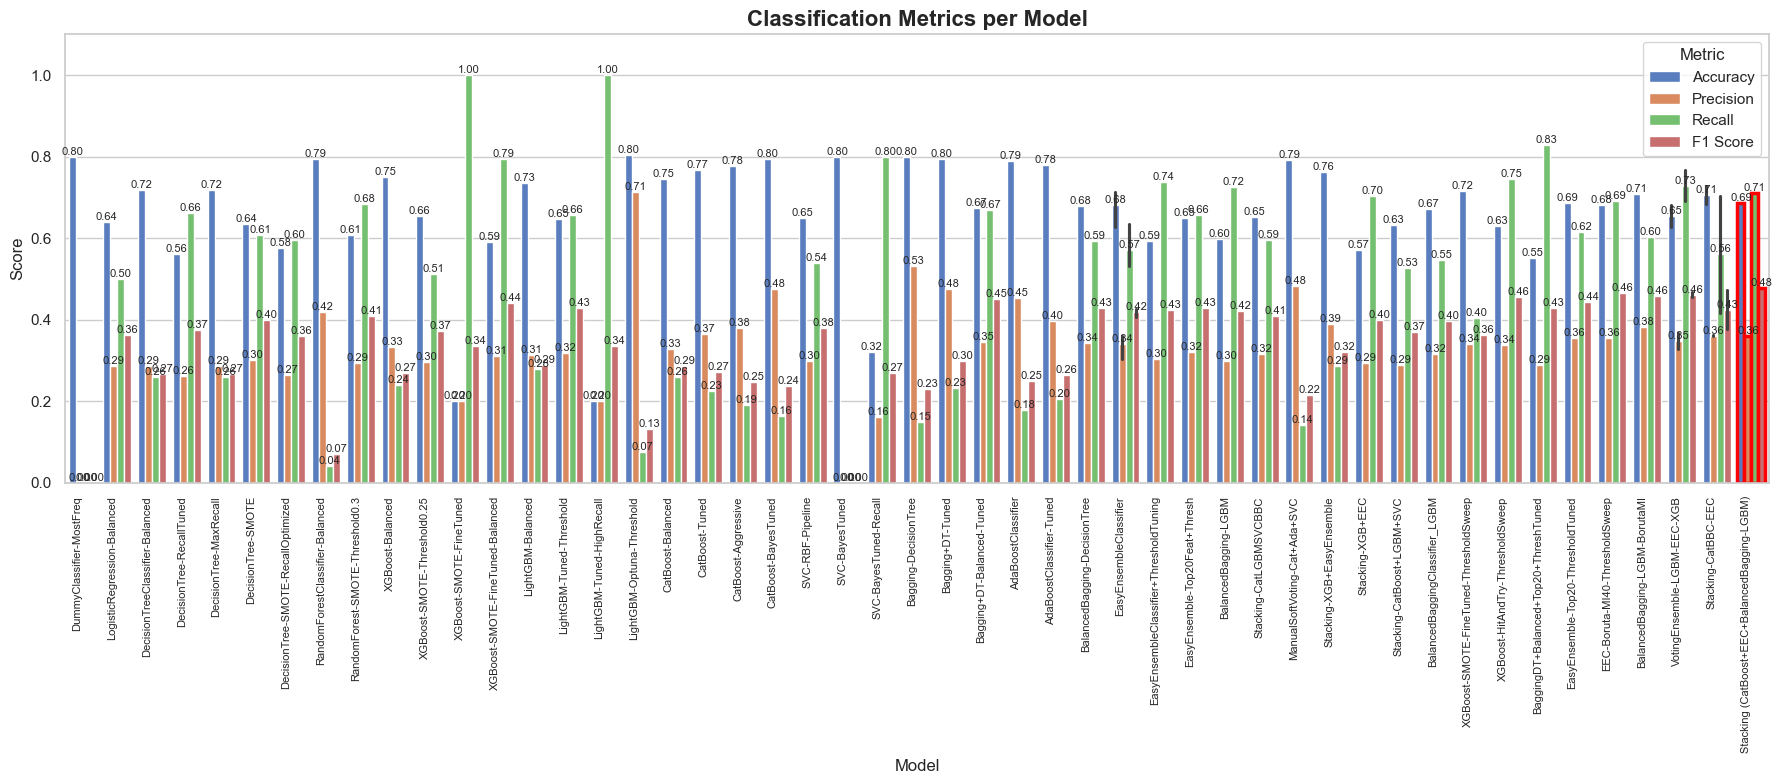

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load CSV
df = pd.read_csv("risk_model_metrics.csv")

# Selected model
highlighted_model = "Stacking (CatBoost+EEC+BalancedBagging-LGBM)"

# Melt the dataframe
metrics_melted = df.melt(
    id_vars=["Name"],
    value_vars=["Accuracy", "Precision", "Recall", "F1 Score"],
    var_name="Metric",
    value_name="Score"
)

# Plot setup
sns.set(style="whitegrid")
plt.figure(figsize=(18, 8))

# Plot grouped barplot
ax = sns.barplot(
    data=metrics_melted,
    x="Name",
    y="Score",
    hue="Metric",
    palette="muted"
)

# Annotate values
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", label_type="edge", fontsize=8)

# === HIGHLIGHT selected model ===
# Loop through x-axis labels to find positions of bars for the selected model
for i, label in enumerate(ax.get_xticklabels()):
    if label.get_text() == highlighted_model:
        for container in ax.containers:
            # Each container has bars for one metric (e.g., all precisions)
            try:
                bar = container[i]  # i-th model in this metric
                bar.set_edgecolor("red")
                bar.set_linewidth(2.5)
            except IndexError:
                continue

# Final aesthetics
plt.title("Classification Metrics per Model", fontsize=16, weight="bold")
plt.xlabel("Model")
plt.ylabel("Score")
plt.xticks(rotation=90, ha='right', fontsize=8)
plt.ylim(0, 1.1)
plt.legend(title="Metric", loc="upper right")

# Save and display
os.makedirs("model_performance", exist_ok=True)
plt.tight_layout()
plt.savefig("model_performance/grouped_metrics_per_model.png", dpi=300)
plt.show()


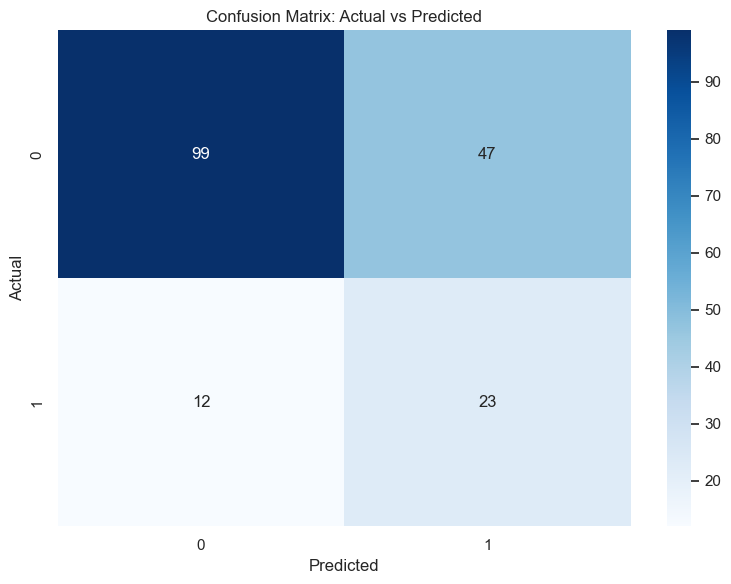

              precision    recall  f1-score   support

           0     0.8919    0.6781    0.7704       146
           1     0.3286    0.6571    0.4381        35

    accuracy                         0.6740       181
   macro avg     0.6102    0.6676    0.6043       181
weighted avg     0.7830    0.6740    0.7062       181



In [22]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Example: assume y_true and y_pred are already defined
# y_true = ...
# y_pred = ...

# Ensure output directory
os.makedirs("model_performance", exist_ok=True)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
labels = sorted(list(set(y_true) | set(y_pred)))  # All classes seen

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix: Actual vs Predicted")
plt.tight_layout()
plt.savefig("model_performance/actual_vs_predicted_confusion_matrix.png", dpi=300)
plt.show()

# Optional: also print detailed classification report
print(classification_report(y_true, y_pred, digits=4))


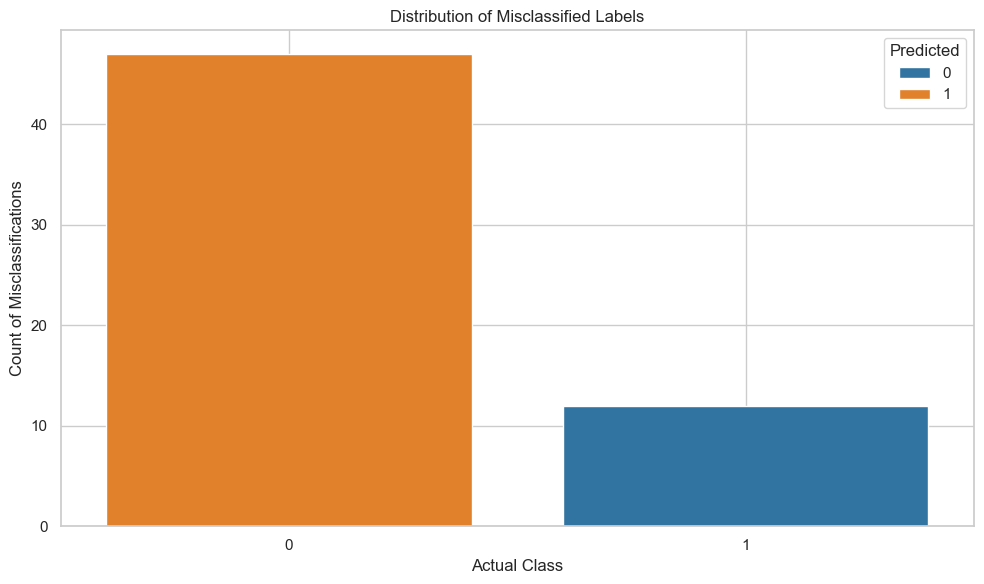

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Assume y_true and y_pred are defined
# y_true = ...
# y_pred = ...

# Create a DataFrame of misclassifications
df_errors = pd.DataFrame({"Actual": y_true, "Predicted": y_pred})
df_errors = df_errors[df_errors["Actual"] != df_errors["Predicted"]]

# Ensure directory exists
os.makedirs("model_performance", exist_ok=True)

# Count misclassified (Actual -> Predicted) pairs
error_counts = df_errors.value_counts().reset_index(name='Count')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=error_counts, x="Actual", y="Count", hue="Predicted", palette="tab10")
plt.title("Distribution of Misclassified Labels")
plt.xlabel("Actual Class")
plt.ylabel("Count of Misclassifications")
plt.grid(True)
plt.tight_layout()
plt.savefig("model_performance/classification_misclass_distribution.png", dpi=300)
plt.show()


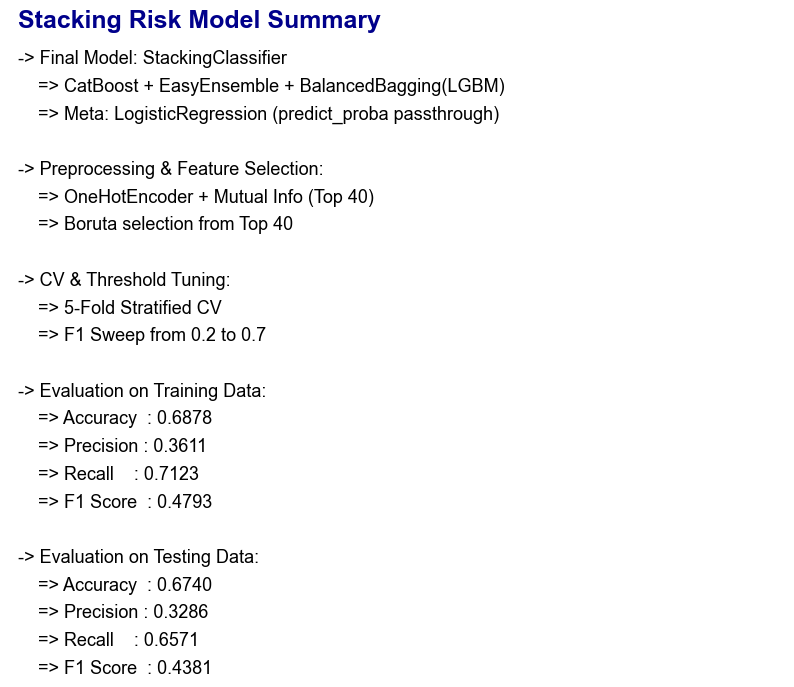

Image saved to: model_performance\stacking_risk_model_summary.png


In [28]:
import matplotlib.pyplot as plt
import os

# Ensure the output directory exists
os.makedirs("model_performance", exist_ok=True)

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 8))
ax.axis("off")

# Title and content text
title = "Stacking Risk Model Summary"
content_lines = [
    "-> Final Model: StackingClassifier",
    "    => CatBoost + EasyEnsemble + BalancedBagging(LGBM)",
    "    => Meta: LogisticRegression (predict_proba passthrough)",
    "",
    "-> Preprocessing & Feature Selection:",
    "    => OneHotEncoder + Mutual Info (Top 40)",
    "    => Boruta selection from Top 40",
    "",
    "-> CV & Threshold Tuning:",
    "    => 5-Fold Stratified CV",
    "    => F1 Sweep from 0.2 to 0.7",
    "",
    "-> Evaluation on Training Data:",
    "    => Accuracy  : 0.6878",
    "    => Precision : 0.3611",
    "    => Recall    : 0.7123",
    "    => F1 Score  : 0.4793",
    "",
    "-> Evaluation on Testing Data:",
    "    => Accuracy  : 0.6740",
    "    => Precision : 0.3286",
    "    => Recall    : 0.6571",
    "    => F1 Score  : 0.4381"
]

# Add title and content to the plot
ax.text(0.01, 1.02, title, fontsize=18, fontweight="bold", verticalalignment="top", color="darkblue")
line_spacing = 0.045
for i, line in enumerate(content_lines):
    y_position = 1.00 - (i + 1) * line_spacing
    ax.text(0.01, y_position, line, fontsize=13, verticalalignment="top", color="black")

# Define the output file name and path
output_file = "stacking_risk_model_summary.png"
output_path = os.path.join("model_performance", output_file)

# Save and display the figure
plt.savefig(output_path, bbox_inches="tight", dpi=300)
plt.show()

print(f"Image saved to: {output_path}")
